<a href="https://colab.research.google.com/github/mahabubmamun/Data_Collection_For_ML/blob/main/sleep_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/Sleep_health_and_lifestyle_dataset.csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Know about the dataset

In [4]:
df['Sleep Disorder'].fillna("None",inplace=True)

/tmp/ipython-input-3852120268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna("None",inplace=True)


In [5]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
df.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
269,270,Female,49,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea
125,126,Female,37,Nurse,7.5,8,60,4,Normal Weight,120/80,70,8000,None
169,170,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,None
301,302,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None
34,35,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,None
44,45,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,None
126,127,Male,38,Lawyer,7.3,8,60,5,Normal,130/85,68,8000,None
116,117,Female,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
75,76,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,None
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [7]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [10]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [11]:
df.drop(columns=['Person ID'],inplace = True)

In [12]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


#Pandas profiling

In [76]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=035f1276ea565fac7a1871ab9e5192cf033330bbc7d89f12f21b1d9bdec1ffe6
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [13]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file = 'sleep.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 61.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Pairplot of this dataset

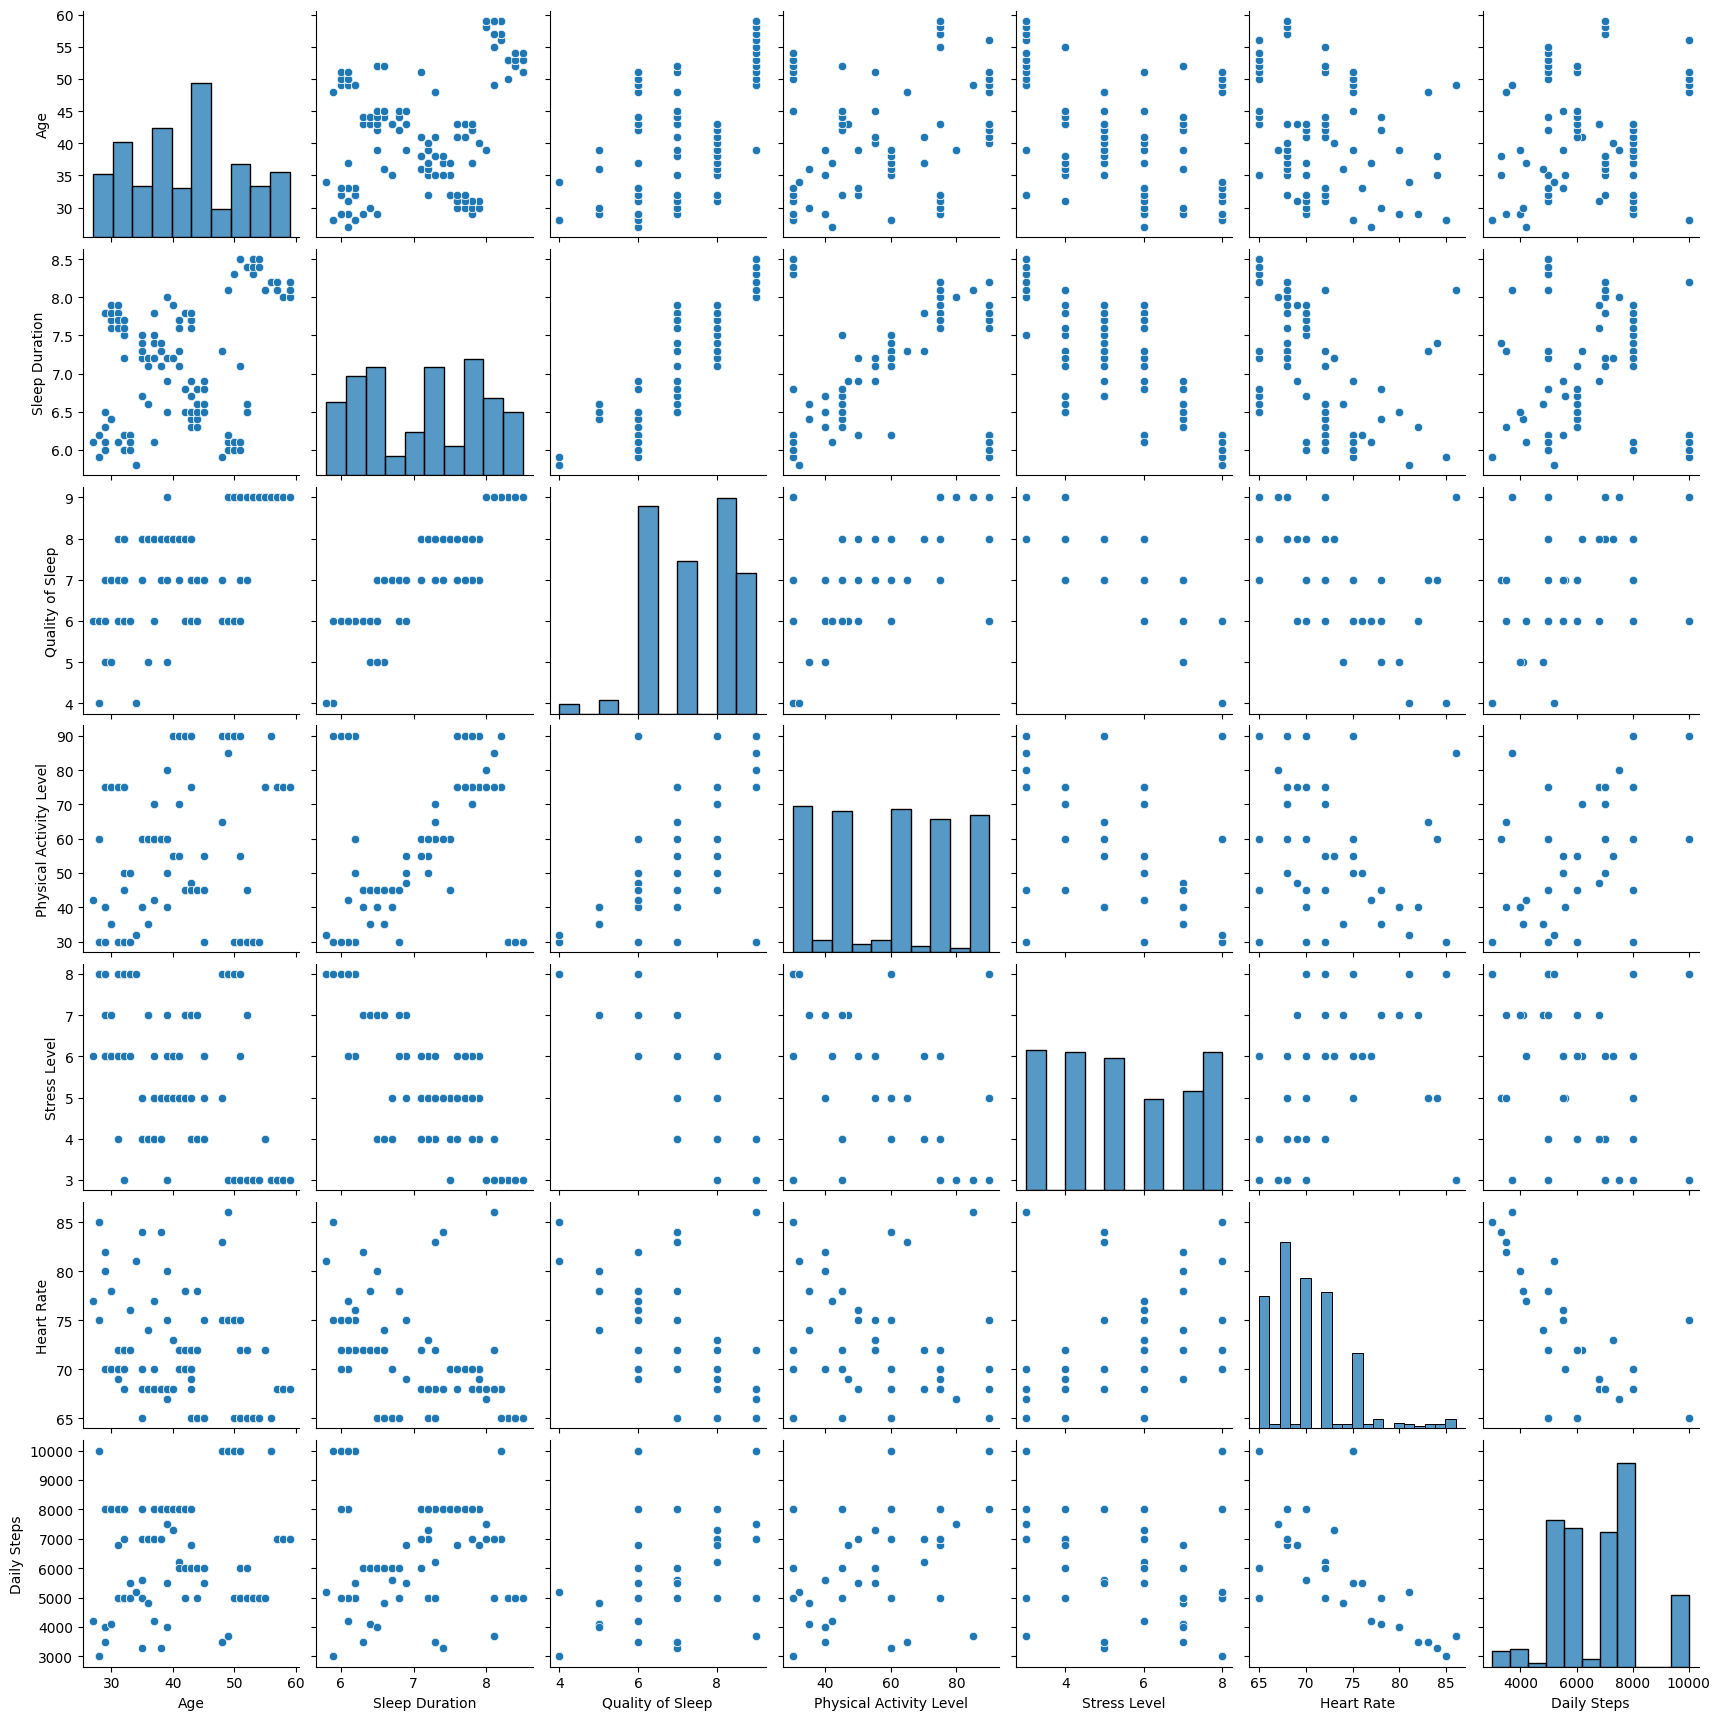

In [16]:
sns.pairplot(df)

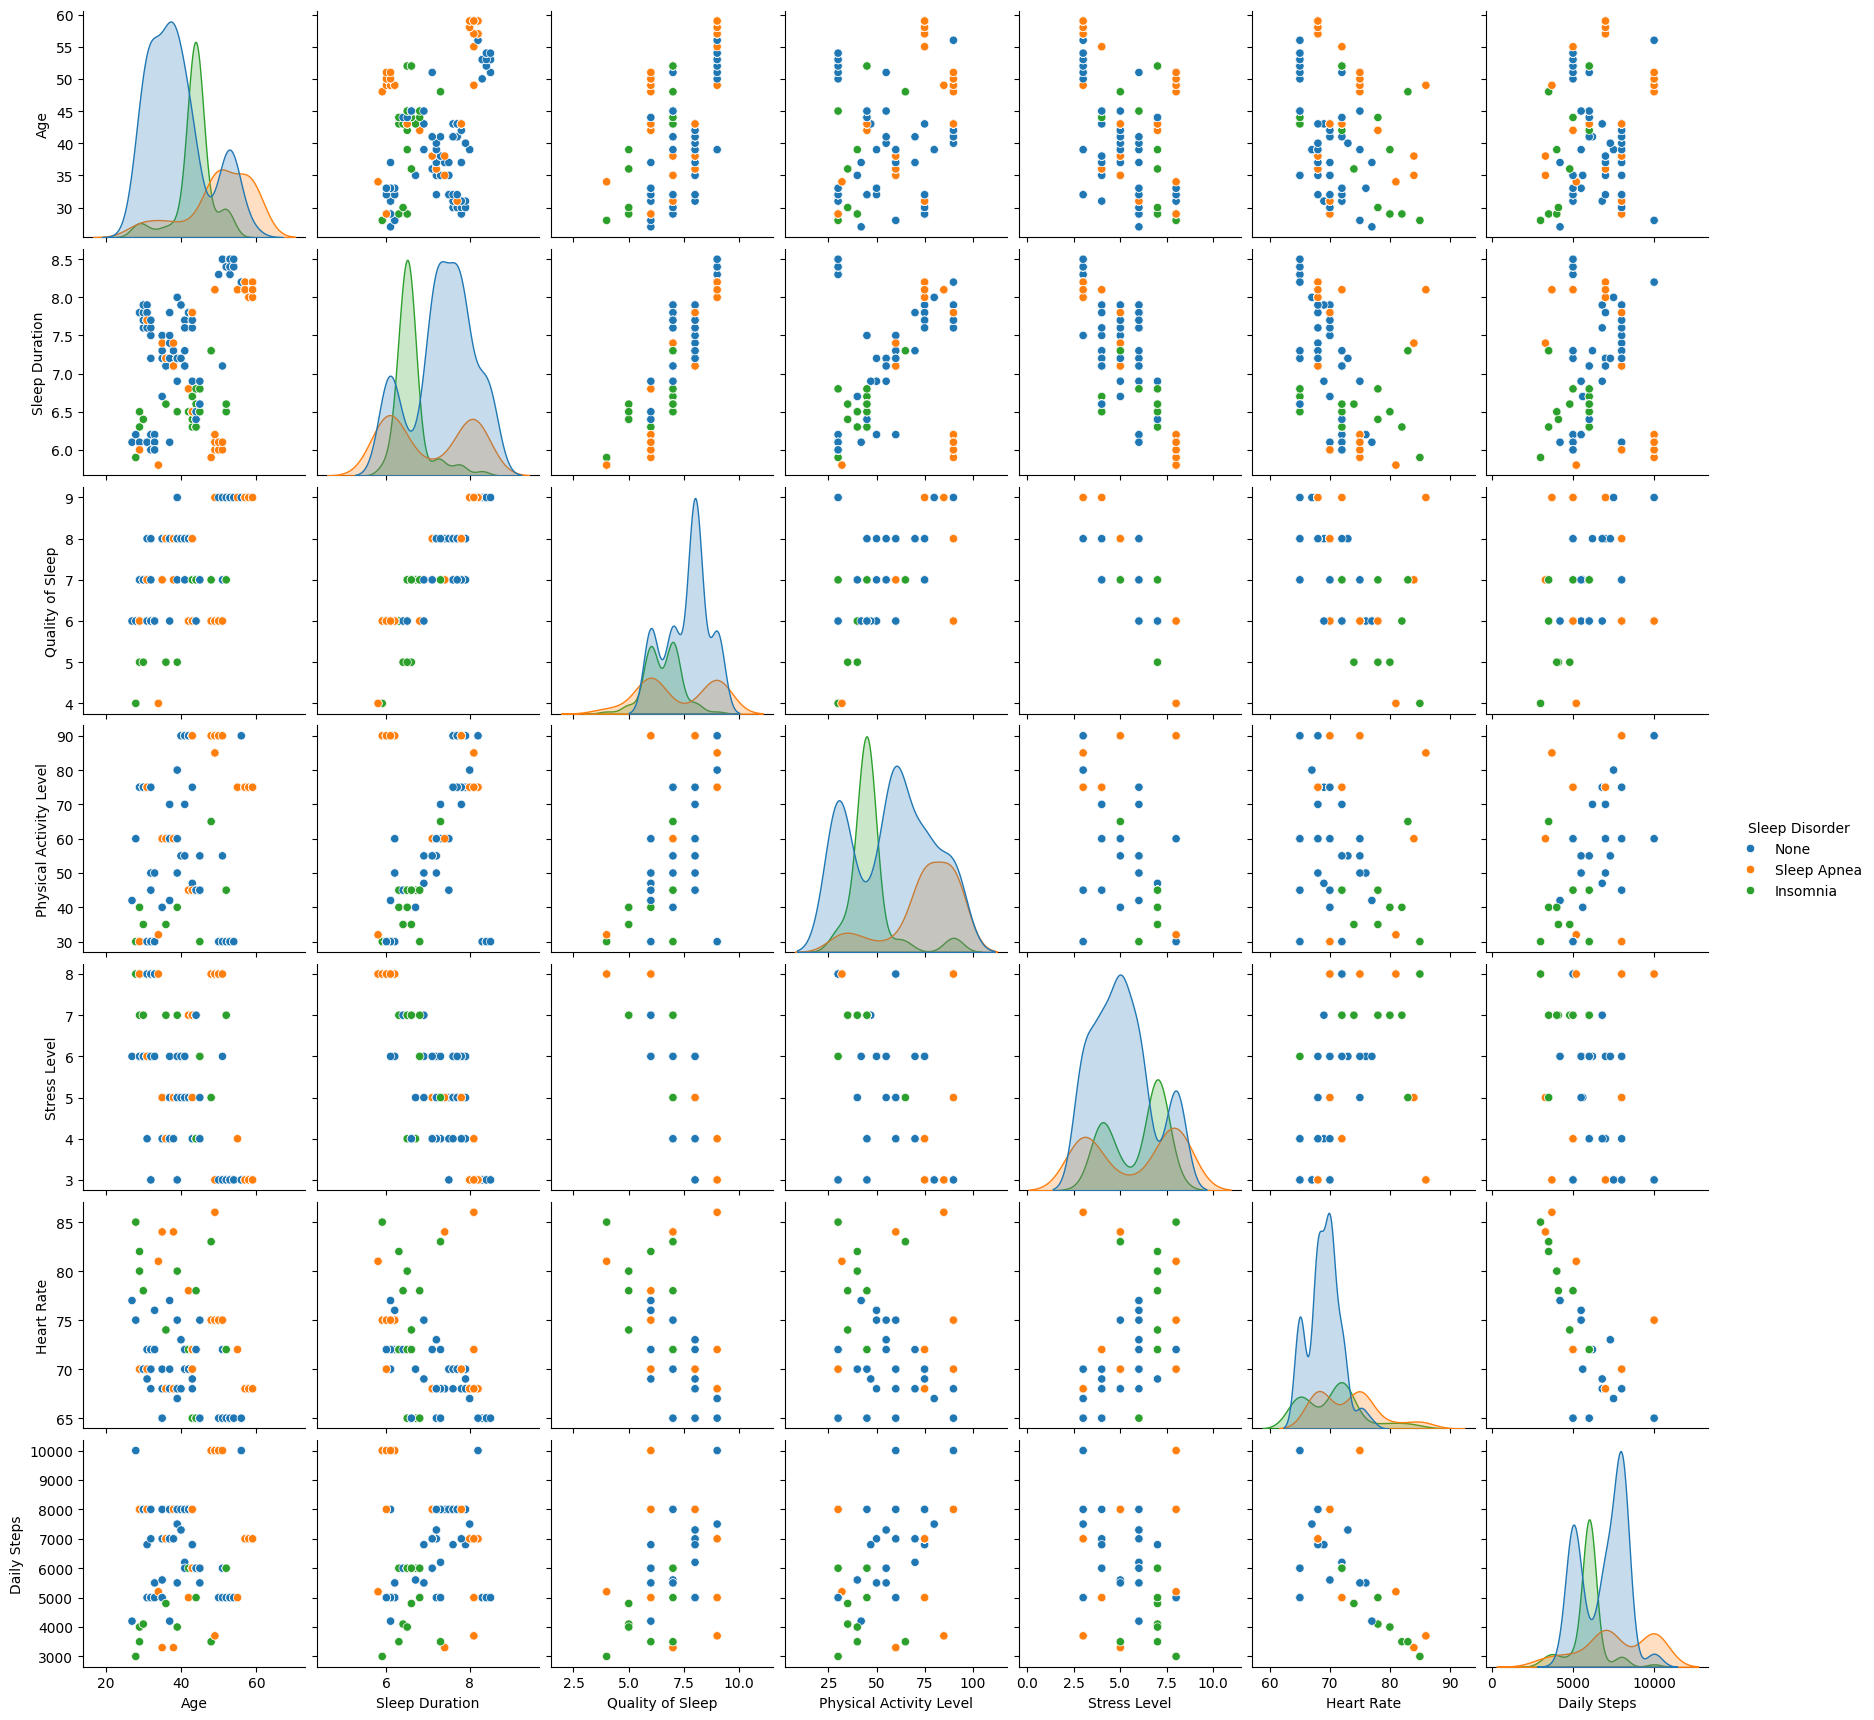

In [15]:
sns.pairplot(df,hue='Sleep Disorder')

**Pairplot shows all the relation of numerical columns. Here we have 7 numerical columns. And each numerical column has scatter graph with another numerical column**

In [17]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [15]:
df.isnull().sum(

)

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0
Heart Rate,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [17]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [18]:
df['Occupation'].count()

np.int64(374)

In [19]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [20]:
df.duplicated().sum()

np.int64(242)

In [21]:
df_no_duplicates = df.drop_duplicates()

In [22]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [23]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [24]:
df[["Systolic Pressure","Diastolic Pressure"]] = df["Blood Pressure"].str.split("/",expand=True).astype(int)

In [25]:
df.drop(columns = ["Blood Pressure"],inplace = True)

In [26]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


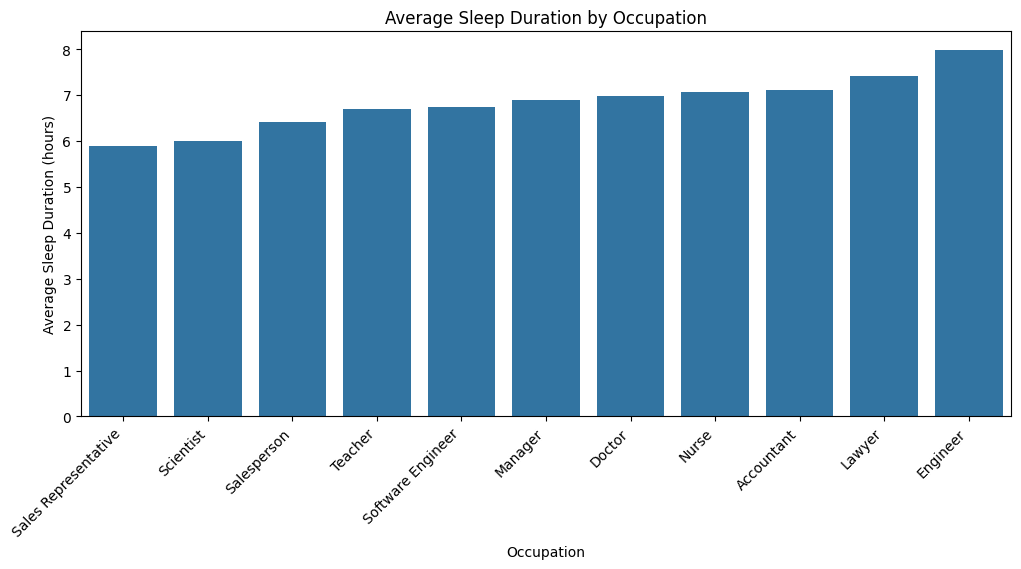

In [27]:
plt.figure(figsize=(12, 5))
occupation_sleep = df.groupby("Occupation")["Sleep Duration"].mean().sort_values()
sns.barplot(x=occupation_sleep.index, y=occupation_sleep.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Sleep Duration (hours)")
plt.xlabel("Occupation")
plt.title("Average Sleep Duration by Occupation")
plt.show()

#Plot disorder count according to both numerical and categorical columns

In [28]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include='number').columns.tolist()

/tmp/ipython-input-3401751508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col,data = df,palette="Set2")


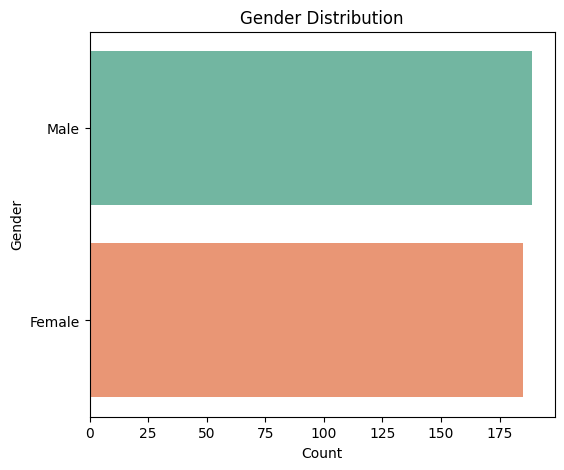

/tmp/ipython-input-3401751508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col,data = df,palette="Set2")


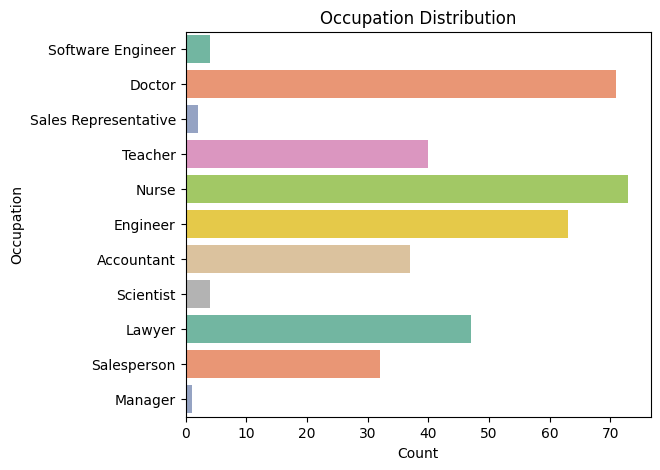

/tmp/ipython-input-3401751508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col,data = df,palette="Set2")


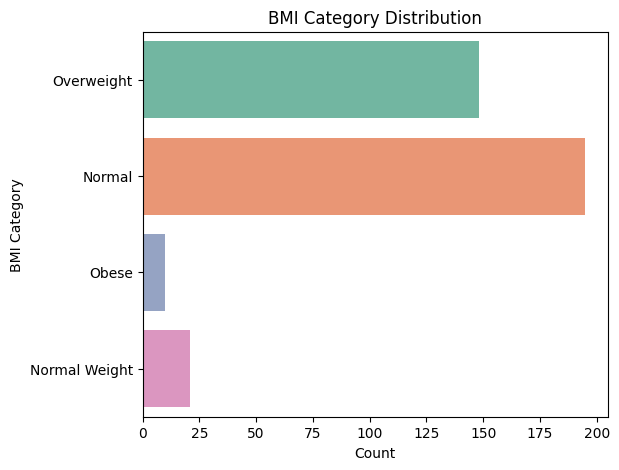

/tmp/ipython-input-3401751508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col,data = df,palette="Set2")


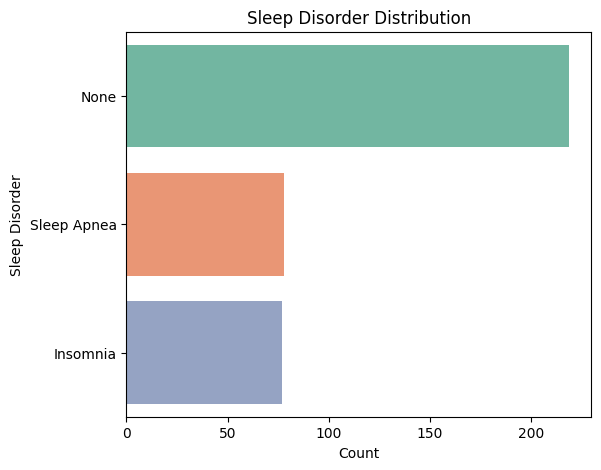

In [29]:
for col in cat_cols:
    plt.figure(figsize=(6,5))
    sns.countplot(y=col,data = df,palette="Set2")
    plt.title(f'{col} Distribution')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

/tmp/ipython-input-1938269235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)


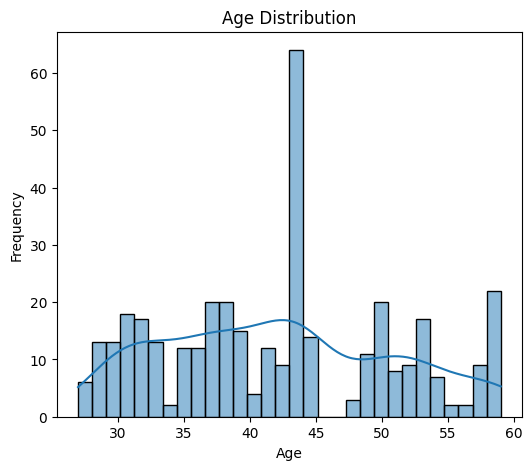

/tmp/ipython-input-1938269235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)


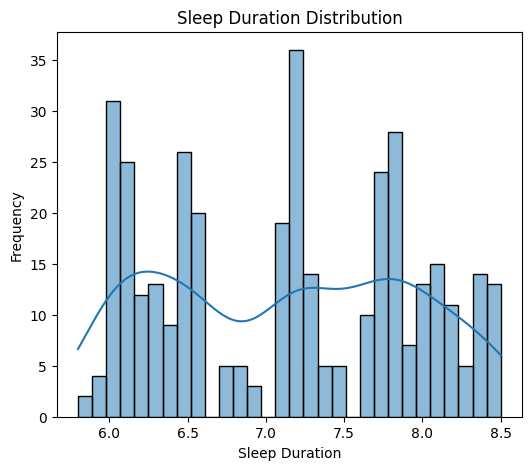

/tmp/ipython-input-1938269235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)


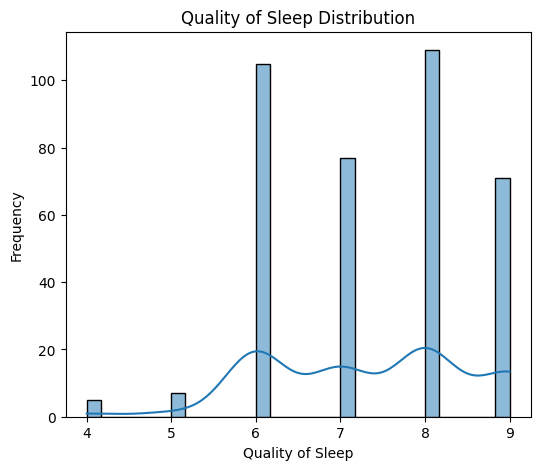

/tmp/ipython-input-1938269235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)


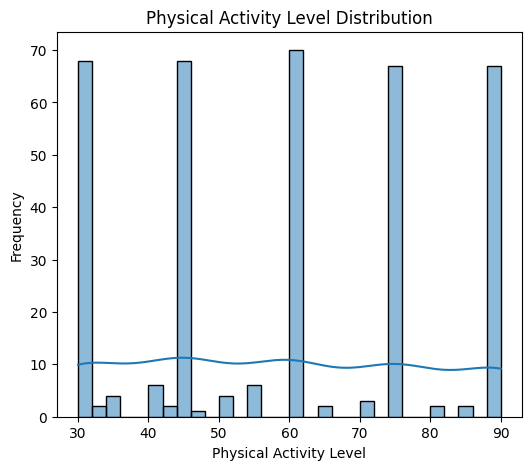

/tmp/ipython-input-1938269235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)


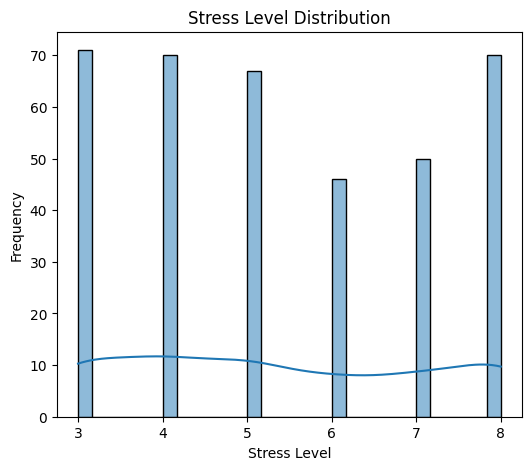

/tmp/ipython-input-1938269235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)


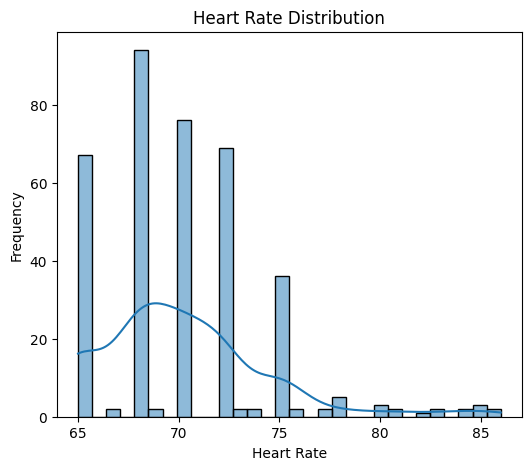

/tmp/ipython-input-1938269235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)


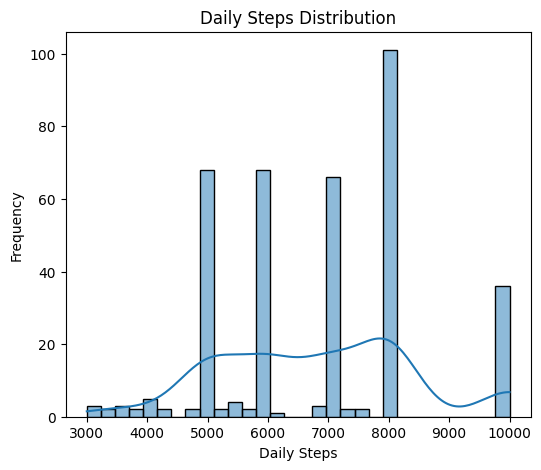

/tmp/ipython-input-1938269235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)


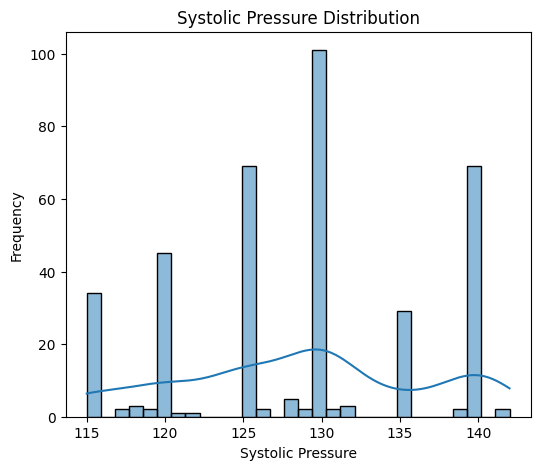

/tmp/ipython-input-1938269235.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)


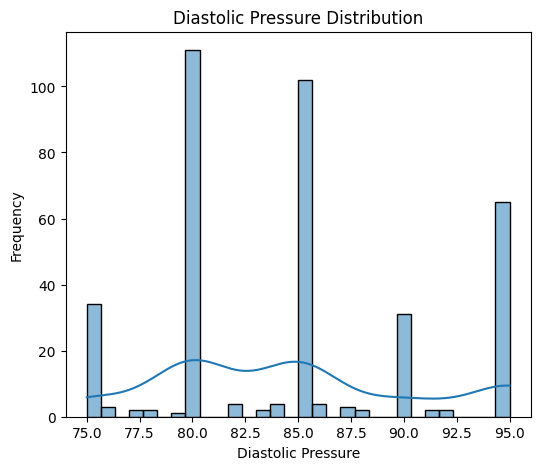

In [30]:
for col in num_cols:
    plt.figure(figsize=(6,5))
    sns.histplot(df[col],bins=30,kde=True,palette="crest",color=None)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Occupation', ylabel='count'>

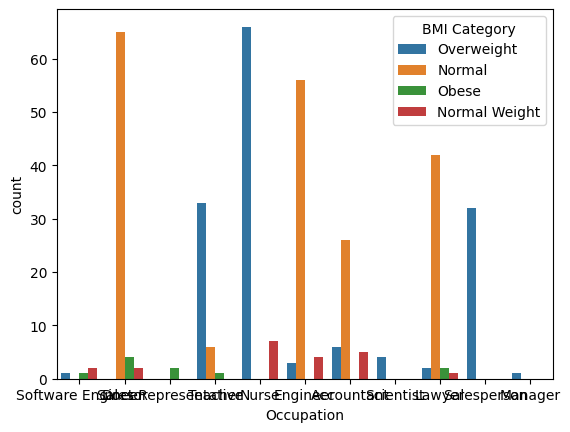

In [31]:
sns.countplot(x="Occupation",hue="BMI Category",data=df)

AttributeError: Text.set() got an unexpected keyword argument 'rotaion'

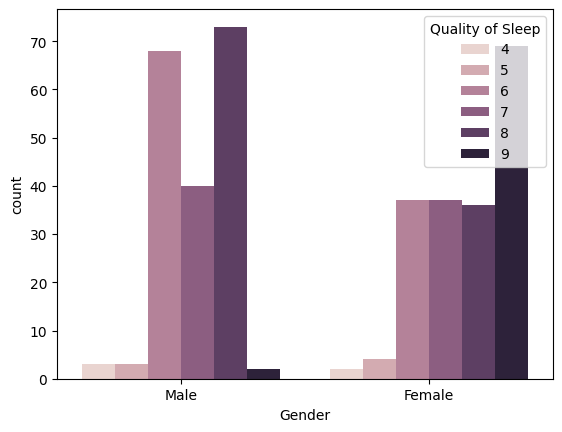

In [32]:
sns.countplot(x='Gender',hue='Quality of Sleep',data=df)
plt.xticks(rotaion=20)
plt.show()

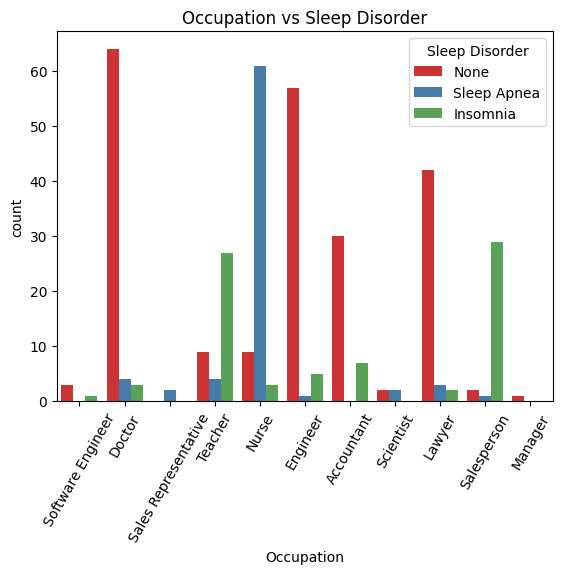

In [33]:
sns.countplot(x="Occupation",hue="Sleep Disorder",data = df,palette="Set1")
plt.xticks(rotation=60)
plt.title("Occupation vs Sleep Disorder")
plt.show()

/tmp/ipython-input-2470822487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot  (x="Gender",y = "Sleep Duration",data = df,palette="pastel")


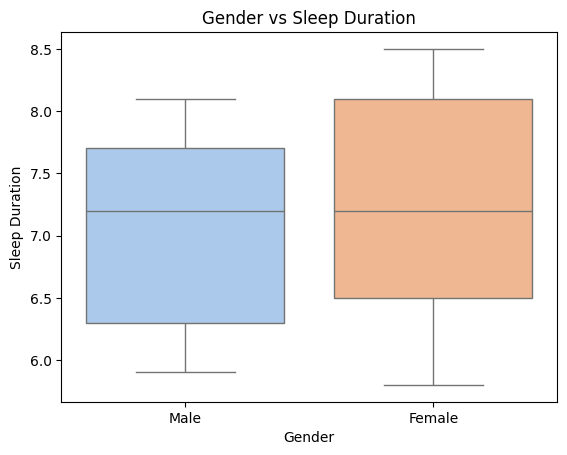

In [34]:
sns.boxplot  (x="Gender",y = "Sleep Duration",data = df,palette="pastel")
plt.title("Gender vs Sleep Duration")
plt.show()

/tmp/ipython-input-2203459523.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender",y="Stress Level",data=df,palette="Set2")


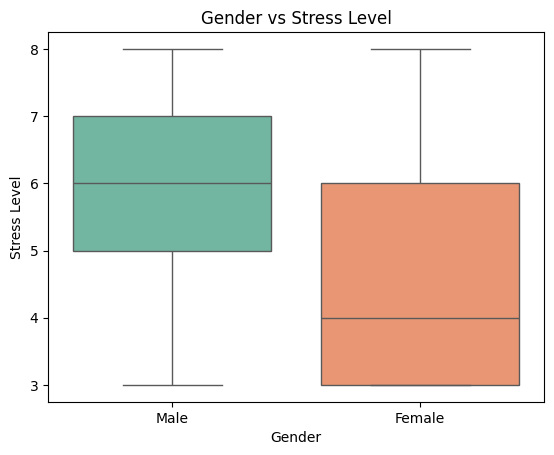

In [35]:
sns.boxplot(x="Gender",y="Stress Level",data=df,palette="Set2")
plt.title("Gender vs Stress Level")
plt.show()

/tmp/ipython-input-3459575061.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender",y="Sleep Duration",data = df,palette="pastel")


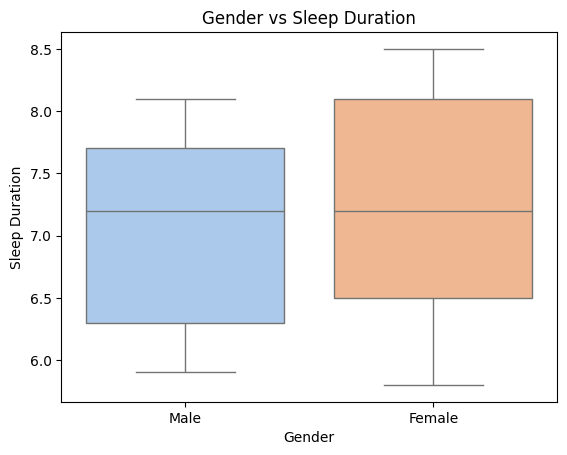

In [36]:
sns.boxplot(x="Gender",y="Sleep Duration",data = df,palette="pastel")
plt.title("Gender vs Sleep Duration")
plt.show()

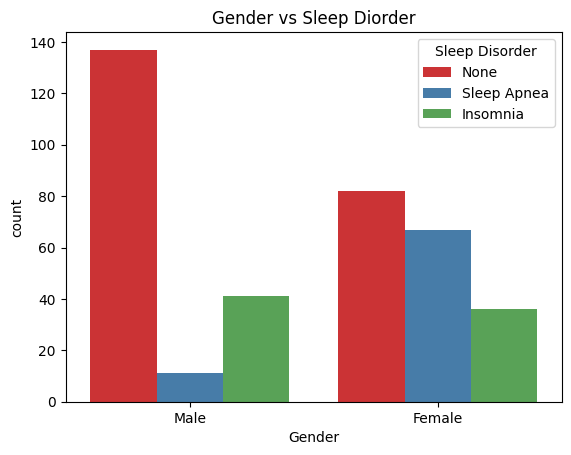

In [37]:
sns.countplot(x="Gender",hue="Sleep Disorder",data  = df,palette="Set1")
plt.title("Gender vs Sleep Diorder")
plt.show()

In [38]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

/tmp/ipython-input-2707060642.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Sleep Disorder",y ="Age",data  = df,palette="Set2")


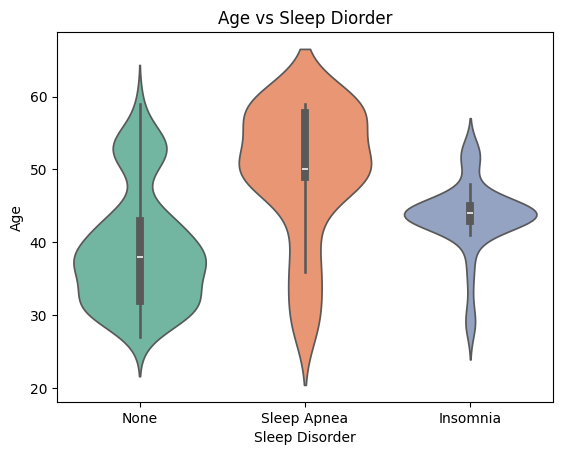

In [39]:
sns.violinplot(x="Sleep Disorder",y ="Age",data  = df,palette="Set2")
plt.title("Age vs Sleep Diorder")
plt.show()

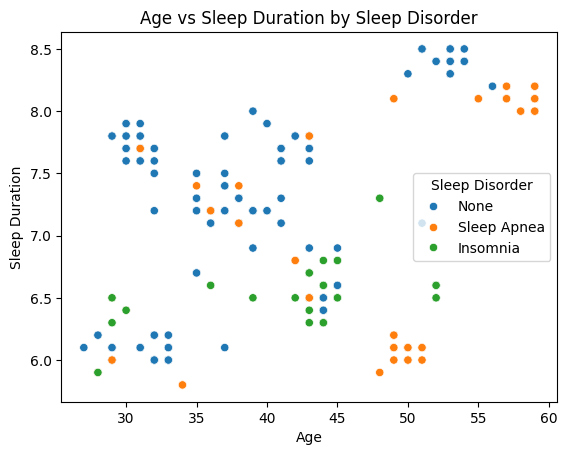

In [40]:
sns.scatterplot(x='Age',y='Sleep Duration',hue='Sleep Disorder',data=df)
plt.title("Age vs Sleep Duration by Sleep Disorder")
plt.show()

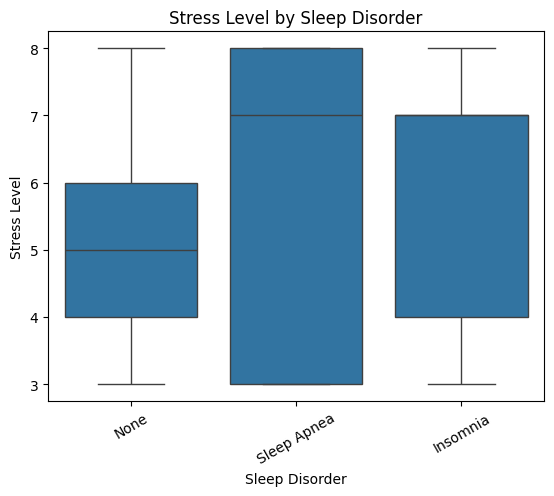

In [41]:
sns.boxplot(x='Sleep Disorder',y='Stress Level',data=df)
plt.title("Stress Level by Sleep Disorder")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-2680807829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df,x="Sleep Disorder",y="Physical Activity Level",palette="flare")


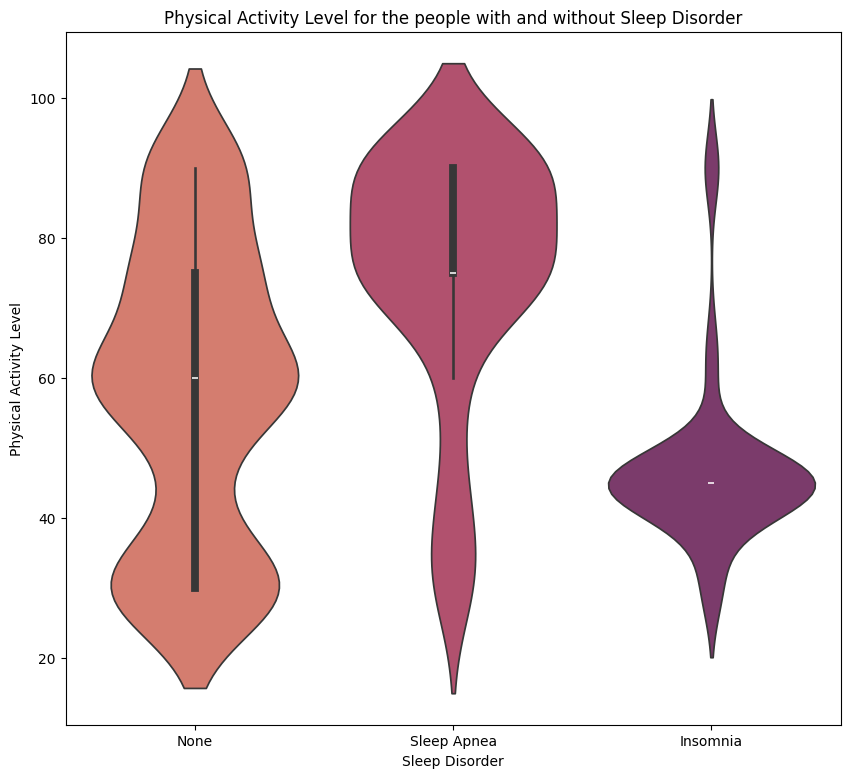

In [42]:
plt.figure(figsize=(10,9))
sns.violinplot(data = df,x="Sleep Disorder",y="Physical Activity Level",palette="flare")
plt.title("Physical Activity Level for the people with and without Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Physical Activity Level")
plt.show()

In [43]:
# correlation matrix
correlation_matrix=df.corr()

#visualization
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,
           annot=True,
           cmap='RdBu',
           vmin=1,
           vmax=1,
           center=0,
           fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'Male'

/tmp/ipython-input-4058518864.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


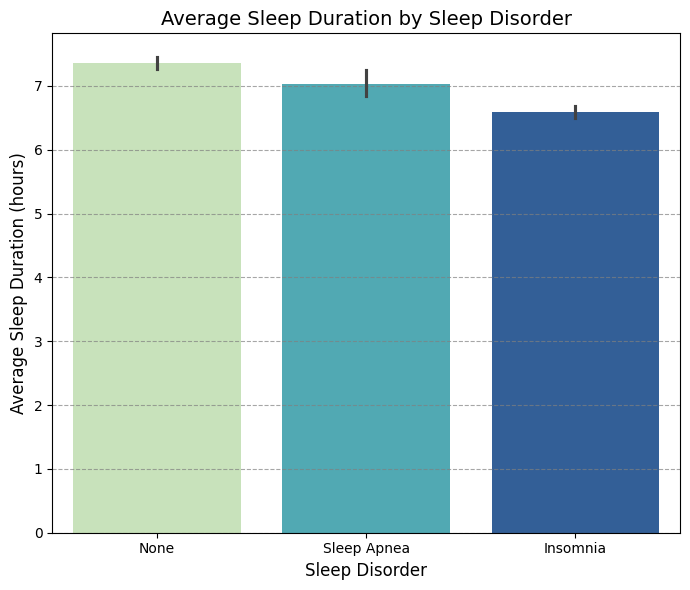

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom color palette (3 colors from YlGnBu)
custom_palette = sns.color_palette("YlGnBu", 3)

# Example: Bar plot
fig, ax = plt.subplots(figsize=(7, 6))
sns.barplot(
    x='Sleep Disorder',
    y='Sleep Duration',
    data=df,
    palette=custom_palette,
    ax=ax
)

ax.set_title('Average Sleep Duration by Sleep Disorder', fontsize=14)
ax.set_xlabel('Sleep Disorder', fontsize=12)
ax.set_ylabel('Average Sleep Duration (hours)', fontsize=12)
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/tmp/ipython-input-423540986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


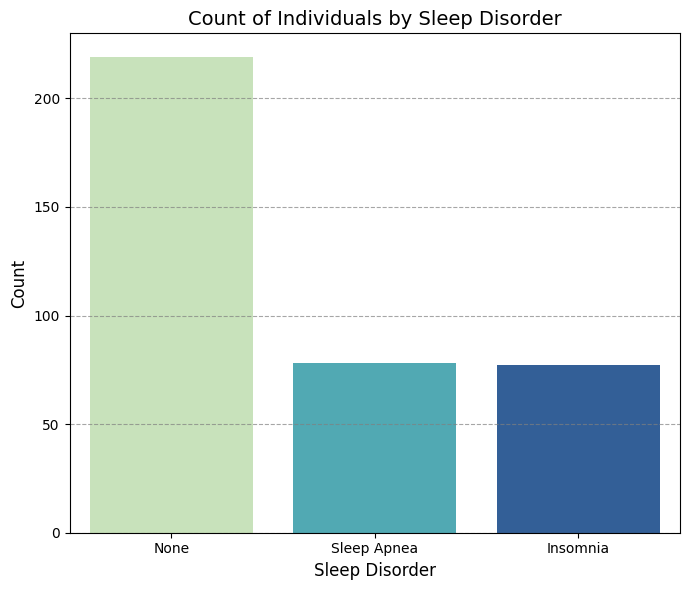

In [45]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.countplot(
    x='Sleep Disorder',
    data=df,
    palette=custom_palette,
    ax=ax
)

ax.set_title('Count of Individuals by Sleep Disorder', fontsize=14)
ax.set_xlabel('Sleep Disorder', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(axis='y', color='gray', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


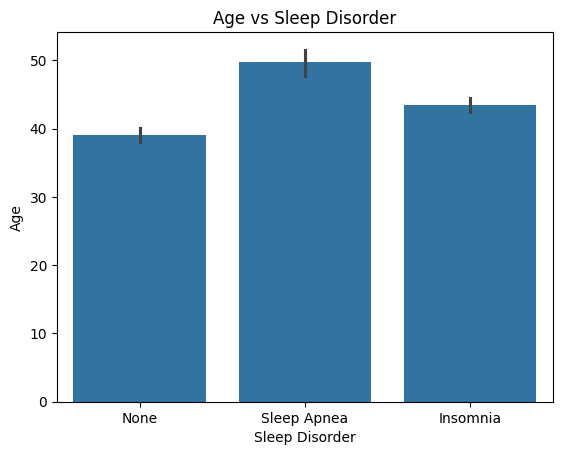

In [46]:
#age vs sleep disorder plot
sns.barplot(x='Sleep Disorder',y='Age',data=df)
plt.title("Age vs Sleep Disorder")
plt.show()

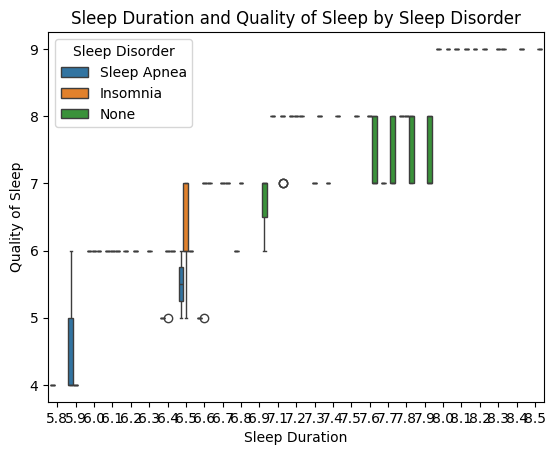

In [47]:
sns.boxplot(x='Sleep Duration',y='Quality of Sleep',hue='Sleep Disorder',data=df)
plt.title("Sleep Duration and Quality of Sleep by Sleep Disorder")
plt.show()

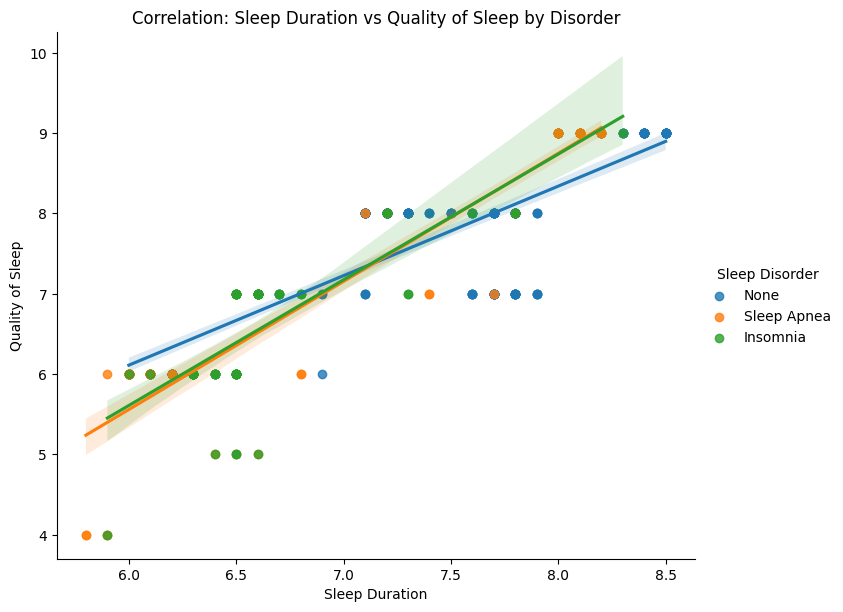

In [48]:
sns.lmplot(data=df, x="Sleep Duration", y="Quality of Sleep", hue="Sleep Disorder", height=6, aspect=1.2)
plt.title("Correlation: Sleep Duration vs Quality of Sleep by Disorder")
plt.show()


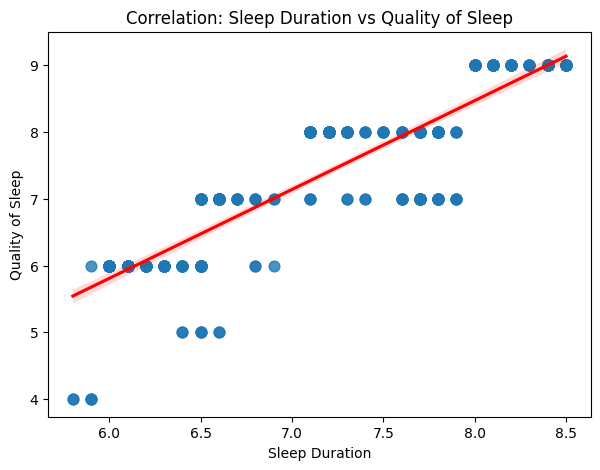

In [49]:

# Example: Sleep Duration vs Quality of Sleep
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Sleep Duration", y="Quality of Sleep", scatter_kws={"s":60}, line_kws={"color":"red"})
plt.title("Correlation: Sleep Duration vs Quality of Sleep")
plt.show()

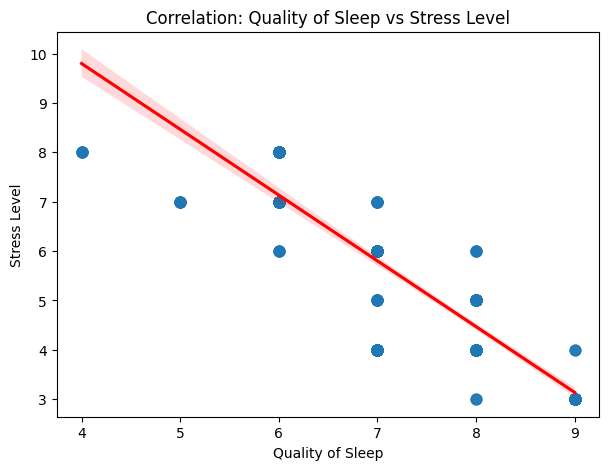

In [50]:
# Example: Quality of Sleep vs Stress Level
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Quality of Sleep", y="Stress Level", scatter_kws={"s":60}, line_kws={"color":"red"})
plt.title("Correlation: Quality of Sleep vs Stress Level")
plt.show()

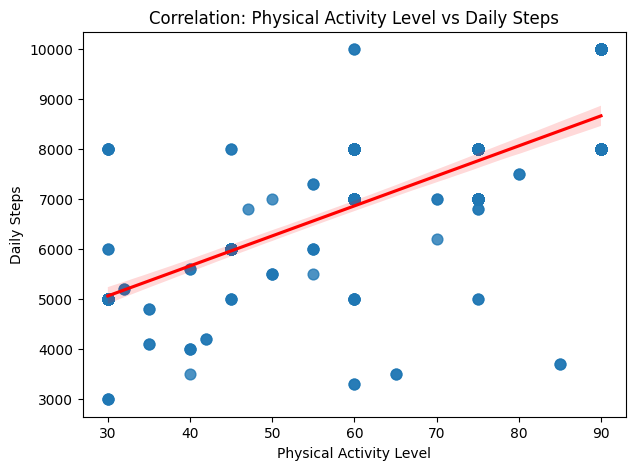

In [51]:
# Example: Physical Activity vs Daily Steps
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="Physical Activity Level", y="Daily Steps", scatter_kws={"s":60}, line_kws={"color":"red"})
plt.title("Correlation: Physical Activity Level vs Daily Steps")
plt.show()

In [52]:
# Create sleep duration bins
bins = [6, 7, 8, 9]
labels = ["6-7", "7-8", "8-9"]
df["Sleep Duration Range"] = pd.cut(df["Sleep Duration"], bins=bins, labels=labels, right=False)


/tmp/ipython-input-1803239831.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(["Sleep Duration Range", "Sleep Disorder"]).size().reset_index(name="Count")


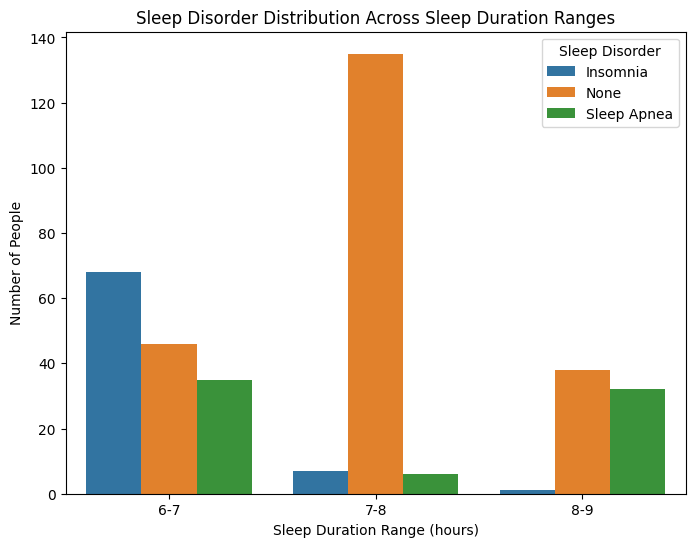

In [53]:

# Count data
count_data = df.groupby(["Sleep Duration Range", "Sleep Disorder"]).size().reset_index(name="Count")

# Plot grouped barplot
plt.figure(figsize=(8,6))
sns.barplot(data=count_data, x="Sleep Duration Range", y="Count", hue="Sleep Disorder")

plt.title("Sleep Disorder Distribution Across Sleep Duration Ranges")
plt.xlabel("Sleep Duration Range (hours)")
plt.ylabel("Number of People")
plt.legend(title="Sleep Disorder")
plt.show()

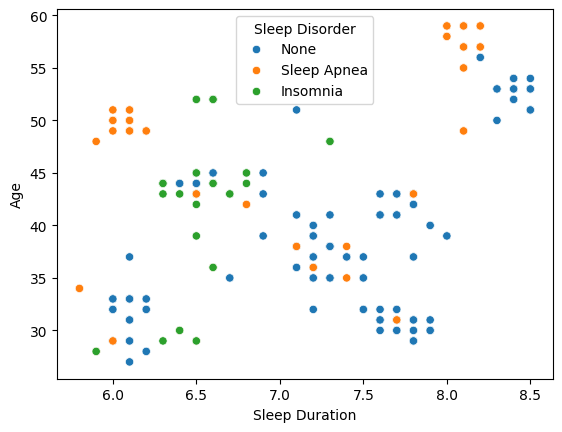

In [54]:
sns.scatterplot(x='Sleep Duration',y='Age',hue='Sleep Disorder',data=df)
plt.show()

**Sleep disorder distribution of different age range**

In [55]:
# Create sleep duration bins
bins = [0, 42, 47, 60]
labels = ["0-42", "42-47", "47-60"]
df["Age Range"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)


/tmp/ipython-input-2149863602.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(["Age Range", "Sleep Disorder"]).size().reset_index(name="Count")


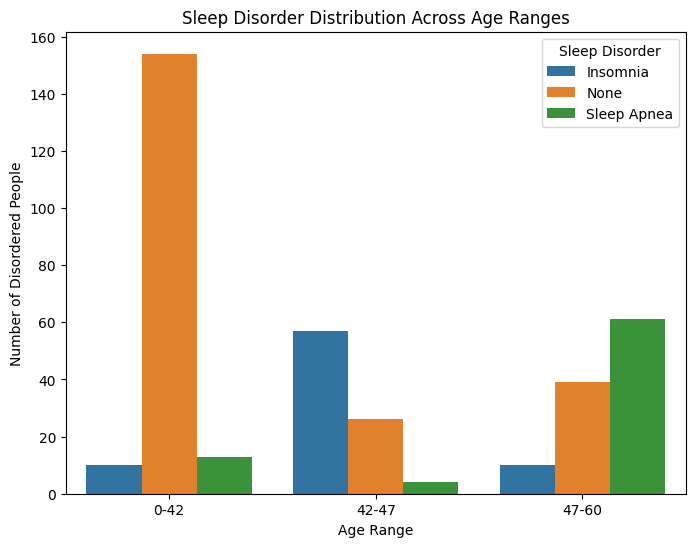

In [56]:

# Count data
count_data = df.groupby(["Age Range", "Sleep Disorder"]).size().reset_index(name="Count")

# Plot grouped barplot
plt.figure(figsize=(8,6))
sns.barplot(data=count_data, x="Age Range", y="Count", hue="Sleep Disorder")

plt.title("Sleep Disorder Distribution Across Age Ranges")
plt.xlabel("Age Range")
plt.ylabel("Number of Disordered People")
plt.legend(title="Sleep Disorder")
plt.show()

In [57]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Sleep Duration Range,Age Range
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,6-7,0-42
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,6-7,0-42
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,6-7,0-42
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,NaN,0-42
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,NaN,0-42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,8-9,47-60
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,8-9,47-60
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,8-9,47-60
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,8-9,47-60


In [58]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

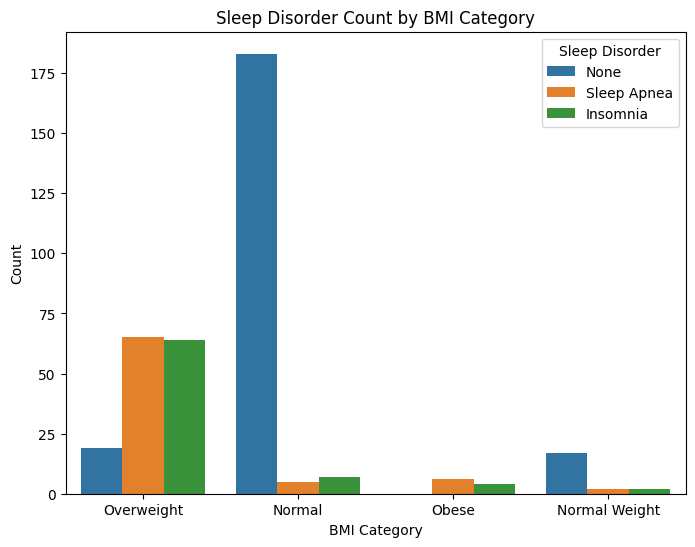

In [59]:
# Barplot: BMI Category vs Sleep Disorder count
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="BMI Category", hue="Sleep Disorder")

plt.title("Sleep Disorder Count by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.legend(title="Sleep Disorder")
plt.show()

In [60]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Sleep Duration Range,Age Range
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,6-7,0-42
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,6-7,0-42
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,6-7,0-42
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,NaN,0-42
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,NaN,0-42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,8-9,47-60
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,8-9,47-60
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,8-9,47-60
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,8-9,47-60


In [61]:
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

#Correlation between daily steps, physical activity and sleep disorder

In [62]:
max_steps = max(df['Daily Steps'].unique())
min_steps = min(df['Daily Steps'].unique())

In [63]:
max_steps,min_steps

(np.int64(10000), np.int64(3000))

In [64]:
corr_stress_steps = df['Daily Steps'].corr(df['Physical Activity Level'])
corr_stress_steps

np.float64(0.7727230504529327)

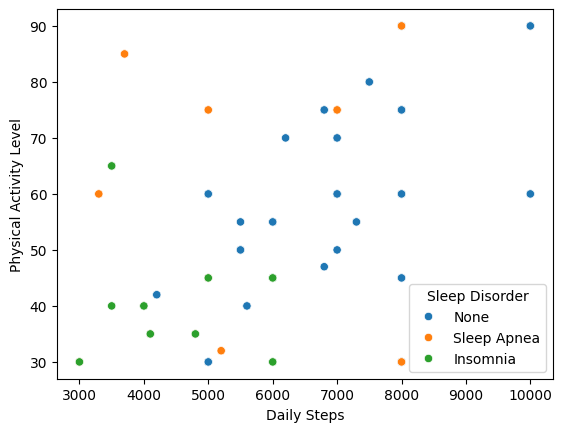

In [65]:
sns.scatterplot(x='Daily Steps',y='Physical Activity Level',hue = 'Sleep Disorder',data=df)
plt.show()

In [66]:
count_dis_steps_activity_df = df[
    (df["Sleep Disorder"] == "None") &
    (df["Daily Steps"]>=5000) &
    (df["Physical Activity Level"]>=45) &
    (df["Physical Activity Level"]<=80)
]

In [67]:
count_none = count_dis_steps_activity_df.shape[0]
count_none

122

In [68]:
count_abs_none = (df['Sleep Disorder']=='None').sum()
count_abs_none

np.int64(219)

#Correlation between sleep duration and quality of sleep

In [69]:
corr_quality_duration = df['Sleep Duration'].corr(df['Quality of Sleep'])
corr_quality_duration

np.float64(0.8832130004106171)

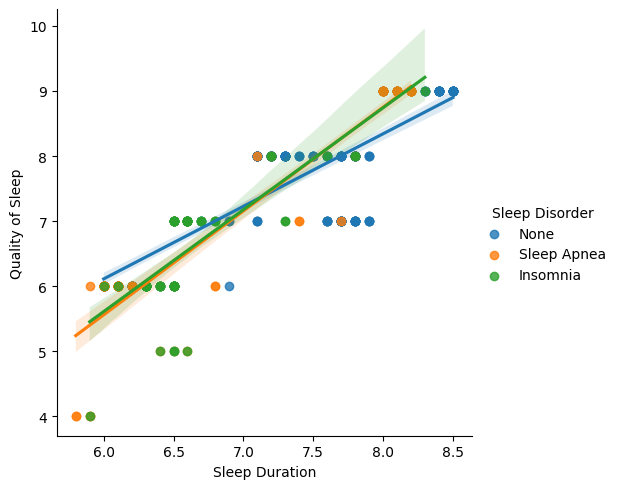

In [70]:
sns.lmplot(x='Sleep Duration',y='Quality of Sleep',hue='Sleep Disorder',data=df)
plt.show()

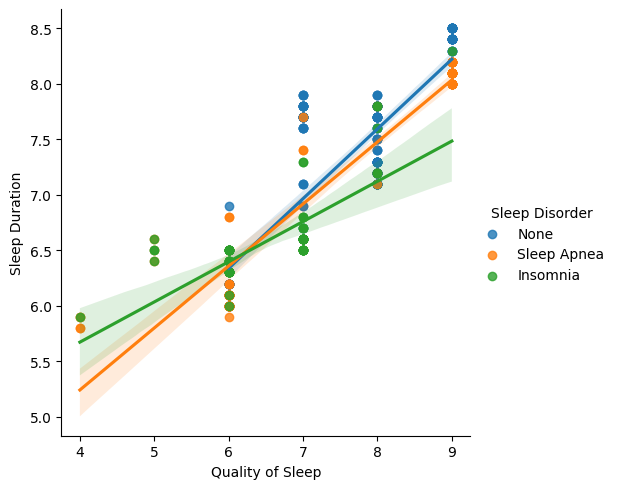

In [71]:
sns.lmplot(x='Quality of Sleep',y='Sleep Duration',hue='Sleep Disorder',data=df)
plt.show()

In [72]:
# Create sleep quality bins
bins = [4, 6, 8, 9]
labels = ["4-6", "6-8", "8-9"]
df["Quality_sleep_range"] = pd.cut(df["Quality of Sleep"], bins=bins, labels=labels, right=False)


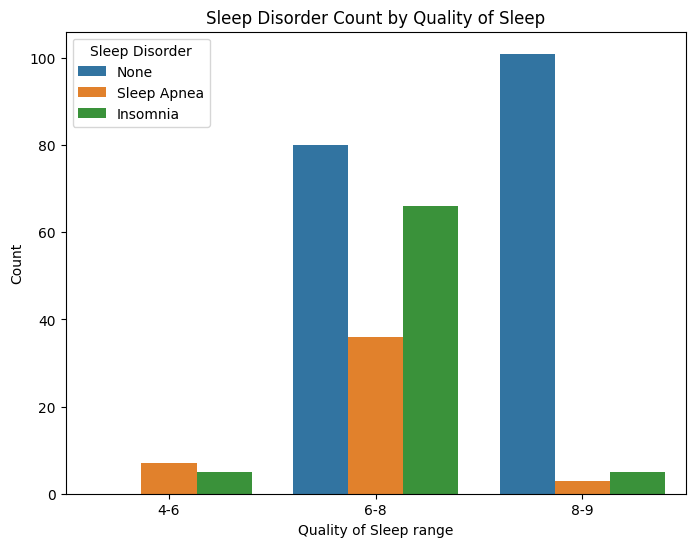

In [73]:
# Barplot: BMI Category vs Sleep Disorder count
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Quality_sleep_range", hue="Sleep Disorder")

plt.title("Sleep Disorder Count by Quality of Sleep")
plt.xlabel("Quality of Sleep range")
plt.ylabel("Count")
plt.legend(title="Sleep Disorder")
plt.show()

In [74]:
# Create sleep duration bins
bins = [6, 7, 9]
labels = ["6-7", "7-9"]
df["Sleep_duration_range"] = pd.cut(df["Sleep Duration"], bins=bins, labels=labels, right=False)


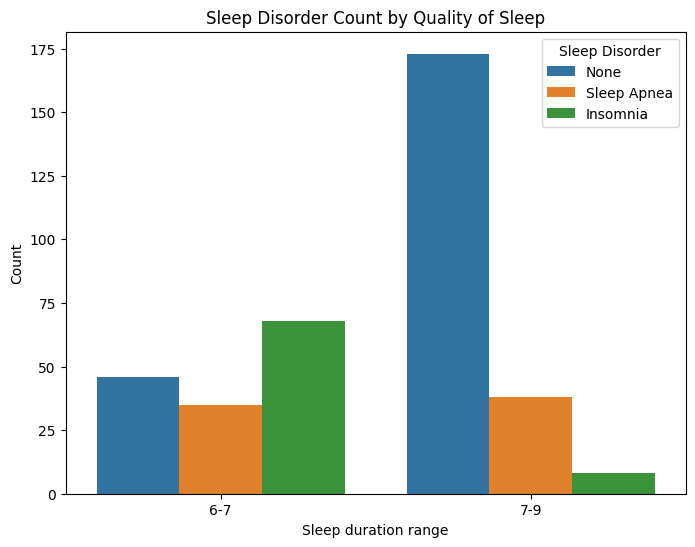

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Sleep_duration_range", hue="Sleep Disorder")

plt.title("Sleep Disorder Count by Quality of Sleep")
plt.xlabel("Sleep duration range")
plt.ylabel("Count")
plt.legend(title="Sleep Disorder")
plt.show()

*according to this graph there is no impact sleep duration on sleep apnea. but if the sleep duration increases disorder count decreases, and if the sleep duration increases insomnia decreases.*